# Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# modularization of charts 

In [48]:
 # univarient Analaysis
def piechart(df, col):
    plt.figure(figsize=(6,10))
    plt.title(col + " piechart distribution")
    chart = df[col].value_counts(normalize=True).plot(kind = "pie", autopct='%.0f%%')
    plt.tight_layout()
    return chart


# modularization of the code countplot  
def countplot(df, col):
    plt.figure(figsize=(10,6))
    plt.title(col + " Count")
    chart = sns.countplot(data = df, x = col)
    plt.tight_layout()
    return chart




# Binary Analysis 
def histplot(df, col, box, col1, col2, color = None,):
    chart = fig = px.histogram(df, 
                   x= col, 
                   marginal= box, 
                   color= color,
                   color_discrete_sequence=[col1, col2],
                   nbins=58, 
                   title='Distribution of ' + col)
    fig.update_layout(bargap=0.1)
    plt.tight_layout()
    return chart


def onehot(df, list1):
    dummies = pd.get_dummies(df[list1])







def lingraph(df, x, y ):
    ax = sns.lineplot(data = df, x = x, y =y)
    plt.title(x + y + " tables " )
    return ax







def scatterplot(df, x, y, hue):
    plt.figure(figsize=(10, 10))
    fig = sns.scatterplot(data = df, hue = hue,  x = x, alpha = .4,  y = y, cmap = plt.get_cmap('jet'))
    plt.tight_layout()
    return fig 





# label processing




def LabelEncoding(df, list1):
    le = LabelEncoder()
    for i , col in enumerate(list1):
        df[col] = le.fit_transform(df[col])
    return df
    
    
    
    
    





In [49]:
df = pd.read_csv("marketing.csv")
df_clean = df.copy()
df 

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39995   53    technician   married   tertiary      no      395      no   no   
39996   30    management    single   tertiary      no     3340      no   no   
39997   54         admin  divorced  secondary      no      200      no   no   
39998   34    management   married   tertiary      no     1047      no   no   
39999   38    technician   married  secondary      no     1442     yes   no   

        contact  day month  duration  campaign    y  
0       unknown    5   may       261         1   no  
1       unknown    5   may       151         1   no  
2       unknown    5   may        76         1   no  
3       unknown    5   may        92         1   no  
4       unknown    5   may       198         1   no  
...         ...  ...   ...       ...       ...  ...  
39995  cellular    3   jun       107         1   no  
39996  cellular    3   jun       238         3  yes  
39997  cellular    3   jun       170         1  yes  
39998  cellular    3   jun       342         1   no  
39999  cellular    3   jun       113         1   no  

[40000 rows x 14 columns]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [51]:
df.describe()

age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550     16.017225    254.824300      2.882175
std        9.641776    2903.769716      8.278127    259.366498      3.239051
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      54.000000      8.000000    100.000000      1.000000
50%       39.000000     407.000000     17.000000    175.000000      2.000000
75%       48.000000    1319.000000     21.000000    313.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000

In [52]:
nums = df.select_dtypes(include= np.number).columns.tolist()


In [53]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [54]:
for col in nums:
    print(f'Value unique columns {col}:')
    print(df[col].nunique())
    print()
    print(f'Value count columns {col}:')
    print(df[col].value_counts())
    print(f' how many null columns in {col}')
    print(df[col].isnull().sum())
    print('-' * 50)

Value unique columns age:
70

Value count columns age:
32    1909
31    1826
33    1770
34    1730
35    1721
      ... 
90       1
94       1
86       1
95       1
81       1
Name: age, Length: 70, dtype: int64
 how many null columns in age
0
--------------------------------------------------
Value unique columns balance:
6849

Value count columns balance:
 0         3209
 1          179
 2          141
 4          126
 3          124
           ... 
-544          1
 4749         1
 21111        1
 4965         1
 102127       1
Name: balance, Length: 6849, dtype: int64
 how many null columns in balance
0
--------------------------------------------------
Value unique columns day:
31

Value count columns day:
20    2655
18    2173
21    1914
17    1812
6     1778
5     1691
28    1650
19    1650
14    1636
8     1620
7     1612
29    1600
15    1468
30    1457
9     1374
13    1325
12    1289
11    1272
16    1215
4     1183
2     1109
27     974
26     895
3      874
23     823
22   

# EDA Age  

In [55]:
df["age"].unique

<bound method Series.unique of 0        58
1        44
2        33
3        47
4        33
         ..
39995    53
39996    30
39997    54
39998    34
39999    38
Name: age, Length: 40000, dtype: int64>

In [56]:
# determines the percentage of people who are that age 
print(df["age"].value_counts(normalize= True))

32    0.047725
31    0.045650
33    0.044250
34    0.043250
35    0.043025
        ...   
90    0.000025
94    0.000025
86    0.000025
95    0.000025
81    0.000025
Name: age, Length: 70, dtype: float64


<AxesSubplot:title={'center':'Age Ditribution Histogram '}, xlabel='age', ylabel='Count'>

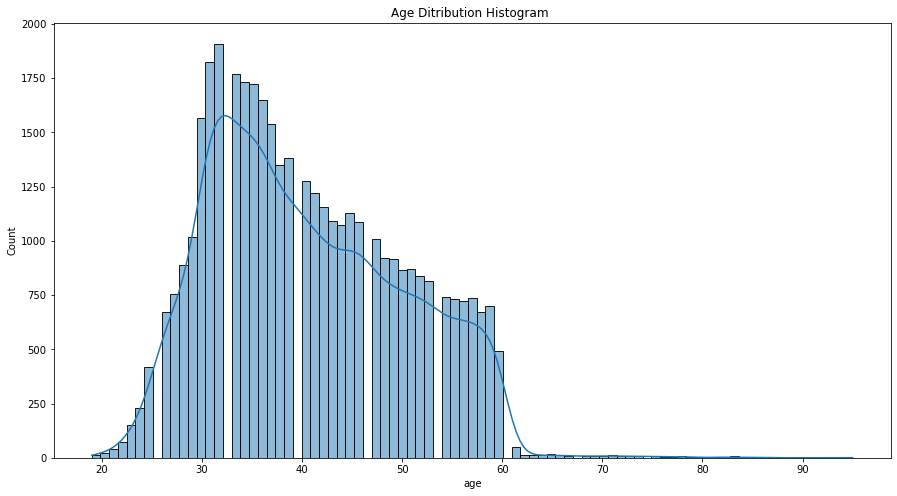

In [57]:
plt.figure(figsize=(15,8))
plt.title("Age Ditribution Histogram ")
sns.histplot( df, x = "age", kde= True)

In [58]:
histplot(df, "age", "box", "red", "black", "loan")

<Figure size 432x288 with 0 Axes>

# Conclusions 
- from this we can tell that the distribution is a normal gauessian distriubution 
- 58 unique ages
- median age is 39
- outliers past age of 71 
- might decide to get rid of outliers using zcore or sd tbd 

# Jobs 

In [59]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

/Users/jaredpeck/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



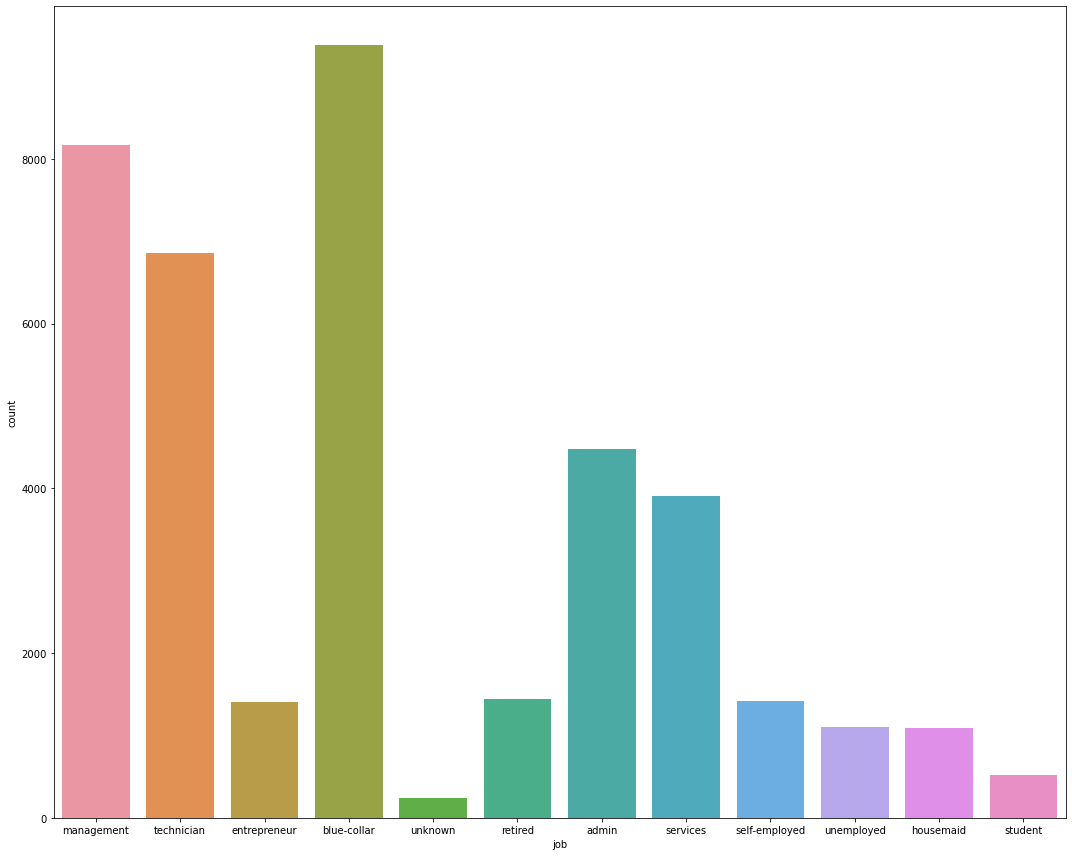

In [60]:
plt.figure(figsize= (15, 12))
sns.countplot(df["job"])
plt.tight_layout()

blue-collar      0.234575
management       0.204150
technician       0.171300
admin            0.112075
services         0.097750
retired          0.035925
self-employed    0.035350
entrepreneur     0.035125
unemployed       0.027600
housemaid        0.027175
student          0.013100
unknown          0.005875
Name: job, dtype: float64


<AxesSubplot:>

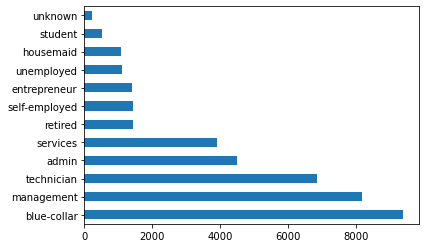

In [61]:
print(df["job"].value_counts(normalize= True))
df["job"].value_counts().plot(kind = "barh")

<AxesSubplot:title={'center':'job piechart distribution'}, ylabel='job'>

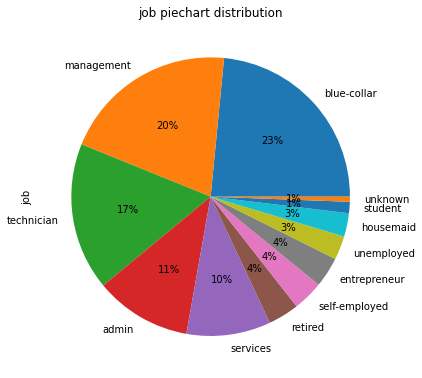

In [62]:
piechart(df, "job")

# conclusions
- over half the job = technical, managment, blue color 
- 1 % of the jobs are unknown
- 1 % of people are only students 

# marraige status 

In [63]:
df["marital"].value_counts()

married     24386
single      10889
divorced     4725
Name: marital, dtype: int64

<AxesSubplot:>

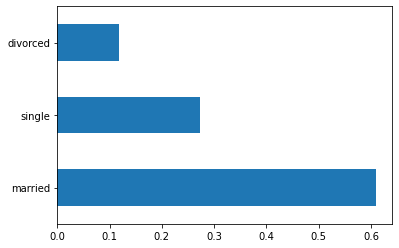

In [64]:
df["marital"].value_counts(normalize= True).plot(kind = "barh")

<AxesSubplot:title={'center':'marital Count'}, xlabel='marital', ylabel='count'>

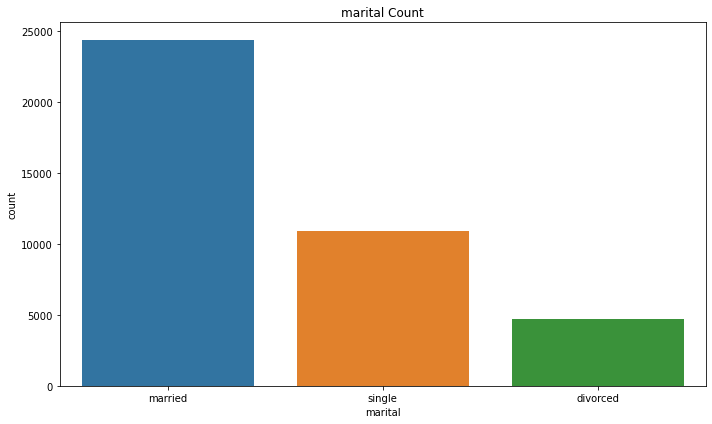

In [65]:
countplot(df, "marital")

<AxesSubplot:title={'center':'marital piechart distribution'}, ylabel='marital'>

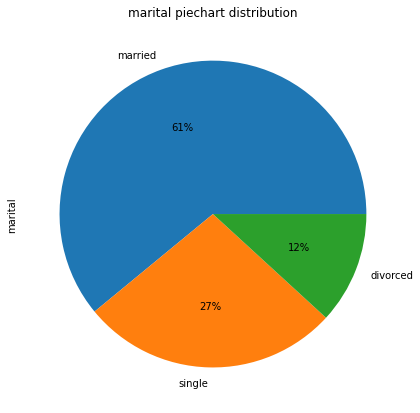

In [66]:
piechart(df, "marital")

# conclusions 
- over 60% of the people are married
- while 27% are single
- 12% are divorced 


In [67]:
df["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

secondary    0.524825
tertiary     0.280150
primary      0.156750
unknown      0.038275
Name: education, dtype: float64


<AxesSubplot:>

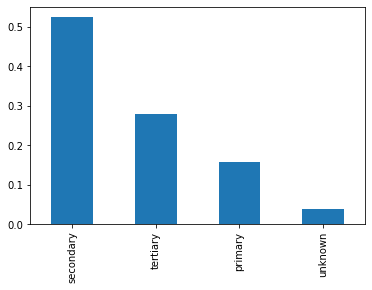

In [68]:
print(df["education"].value_counts(normalize= True))
df["education"].value_counts(normalize= True).plot(kind = "bar")

<AxesSubplot:title={'center':'education piechart distribution'}, ylabel='education'>

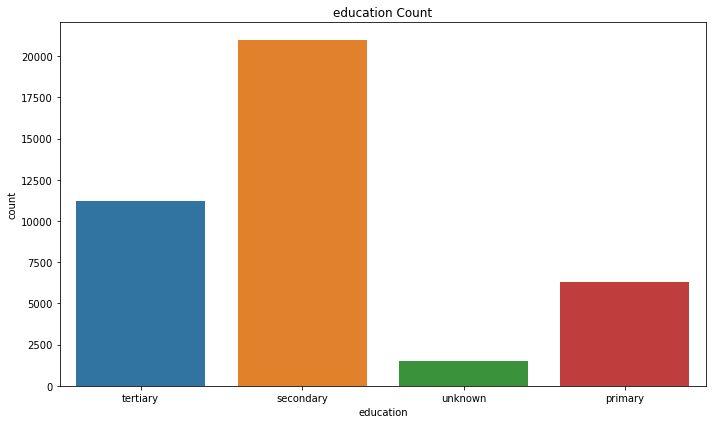

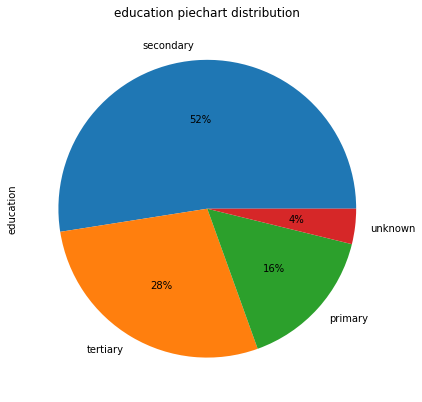

In [69]:
countplot(df, "education")
piechart(df, "education")


# conclusion 
 - most people are in secondary school 
 - unknown is the least with 4%

In [70]:
df["default"].value_counts(normalize= True)

no     0.979775
yes    0.020225
Name: default, dtype: float64

<AxesSubplot:title={'center':'default piechart distribution'}, ylabel='default'>

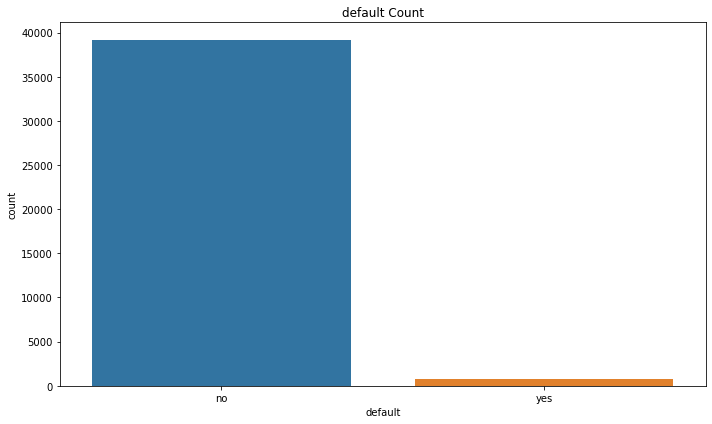

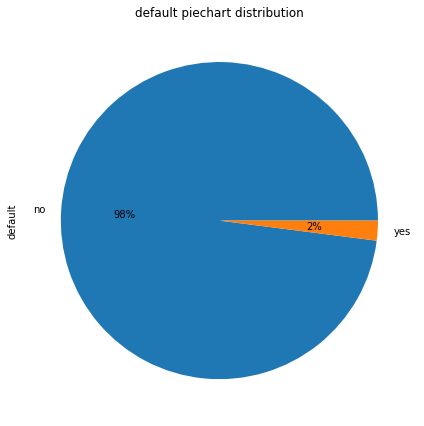

In [71]:
countplot(df, "default")
piechart(df, "default")

# Conclusions 
- over 98 % does not have credit in default 
- 2 % do not have credit in default 


<AxesSubplot:title={'center':'month piechart distribution'}, ylabel='month'>

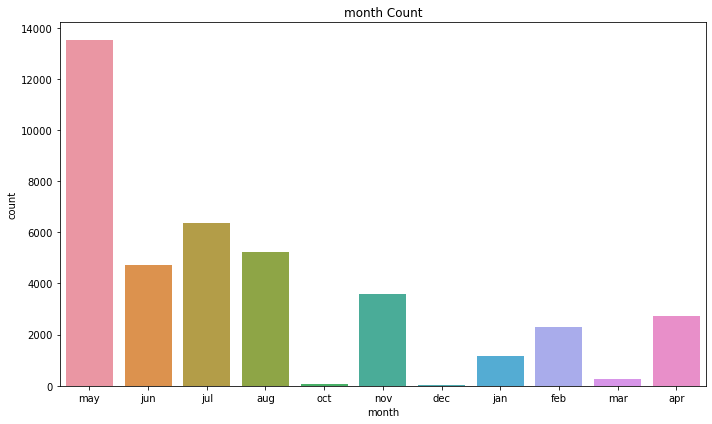

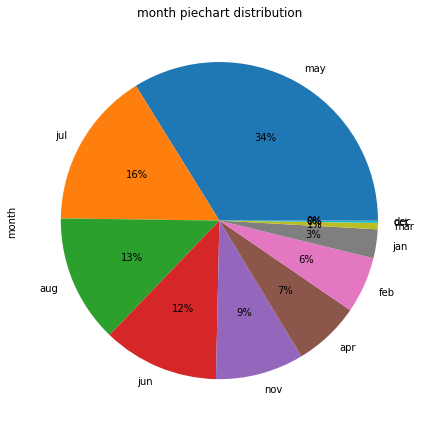

In [72]:
countplot(df, "month")
piechart(df, "month")

# conclusion 
- the most prevelant is may over 34%
- March and Dec little to no influence
-

yes    0.600775
no     0.399225
Name: housing, dtype: float64


<AxesSubplot:>

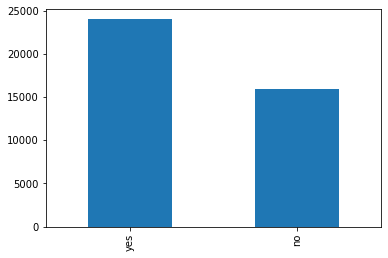

In [73]:
print(df["housing"].value_counts(normalize=True))
df["housing"].value_counts().plot(kind = "bar")

<AxesSubplot:title={'center':'housing piechart distribution'}, ylabel='housing'>

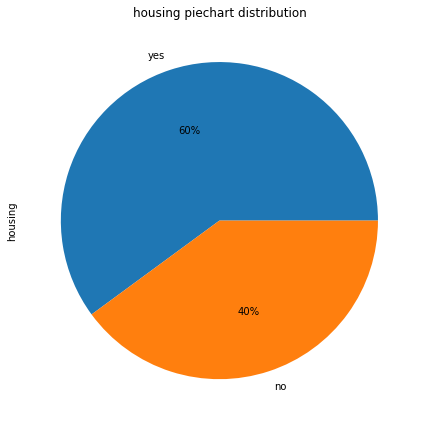

In [74]:
piechart(df, "housing")

In [75]:
# housing the distrubtion of house 40% no 60% yes

In [76]:
df["loan"].unique()

array(['no', 'yes'], dtype=object)

no     0.82675
yes    0.17325
Name: loan, dtype: float64


<AxesSubplot:>

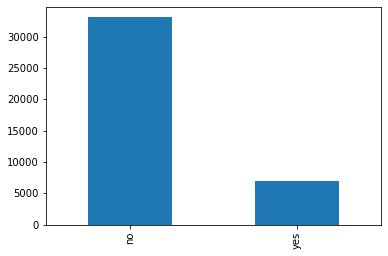

In [77]:
print(df["loan"].value_counts(normalize=True))
df["loan"].value_counts().plot(kind = "bar")

<AxesSubplot:title={'center':'loan piechart distribution'}, ylabel='loan'>

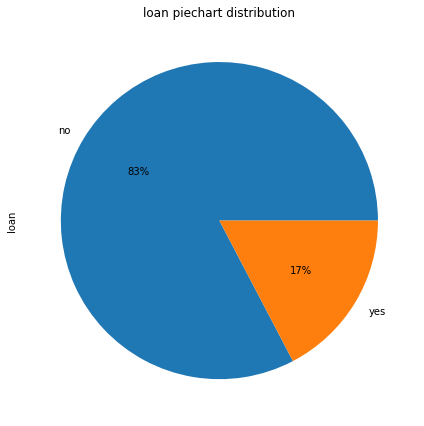

In [78]:
piechart(df, "loan")

In [79]:
df["day"]

0        5
1        5
2        5
3        5
4        5
        ..
39995    3
39996    3
39997    3
39998    3
39999    3
Name: day, Length: 40000, dtype: int64

20    0.066375
18    0.054325
21    0.047850
17    0.045300
6     0.044450
5     0.042275
28    0.041250
19    0.041250
14    0.040900
8     0.040500
7     0.040300
29    0.040000
15    0.036700
30    0.036425
9     0.034350
13    0.033125
12    0.032225
11    0.031800
16    0.030375
4     0.029575
2     0.027725
27    0.024350
26    0.022375
3     0.021850
23    0.020575
22    0.019325
25    0.017375
31    0.014775
10    0.009100
24    0.008800
1     0.004400
Name: day, dtype: float64


<AxesSubplot:title={'center':'day Count'}, xlabel='day', ylabel='count'>

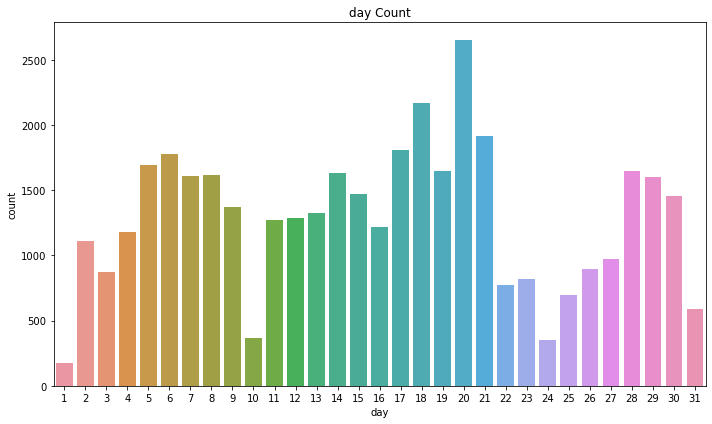

In [80]:
print(df["day"].value_counts(normalize=True))
countplot(df, "day")

In [81]:
df["campaign"].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

<AxesSubplot:title={'center':'campaign Count'}, xlabel='campaign', ylabel='count'>

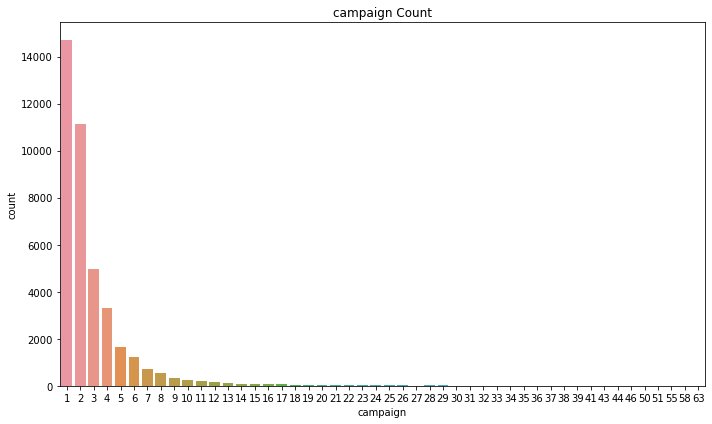

In [82]:
countplot(df, "campaign")

# heatmap



<AxesSubplot:>

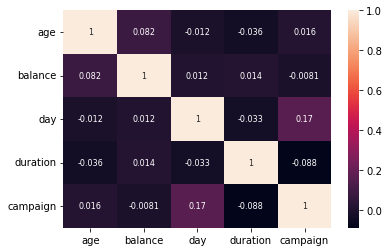

In [83]:
sns.heatmap(df.corr(), annot= True, annot_kws= {"size": 8} )

It appears as though no values are significantly highly cooorolated with eachother past a minimum threshold 

<AxesSubplot:xlabel='age', ylabel='balance'>

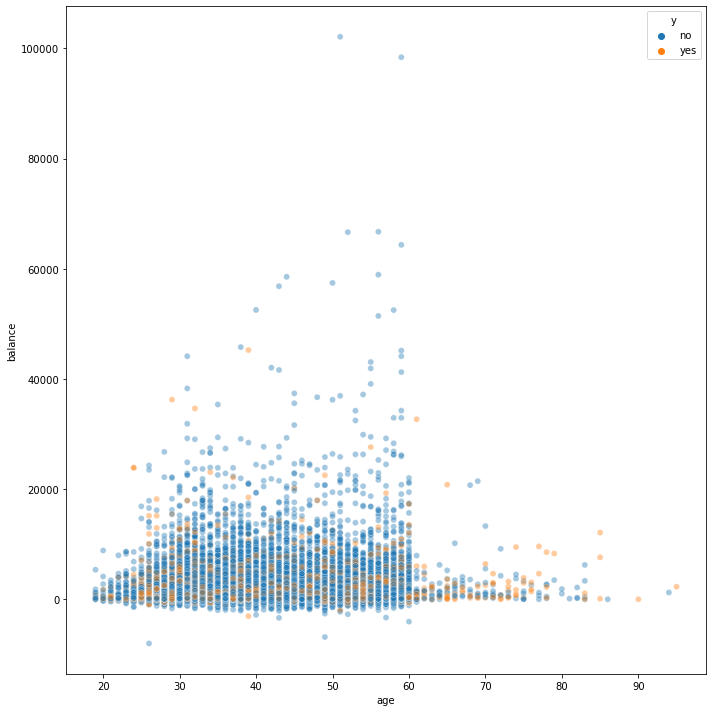

In [84]:
scatterplot(df, "age", "balance", "y")

In [85]:
histplot(df, "age", "box", "red", "black", "y")

<Figure size 432x288 with 0 Axes>

- Normal distribution between the Age and yes/no to the deposit 
- less individuals seem to be getting it at later ages. 

In [86]:
histplot(df, "month", "box", "blue", "black", "y")

<Figure size 432x288 with 0 Axes>

- for each month it shows that there is signifantly more people who have not subscribed to the deposit 
- least amount of subscribers happens in oct, dec, and march. 

In [87]:
histplot(df, "day", "box", "blue", "black", "y")

<Figure size 432x288 with 0 Axes>

In [88]:
nums = df.select_dtypes(include= np.number).columns.tolist()
nums

['age', 'balance', 'day', 'duration', 'campaign']

<AxesSubplot:title={'center':'agebalance tables '}, xlabel='age', ylabel='balance'>

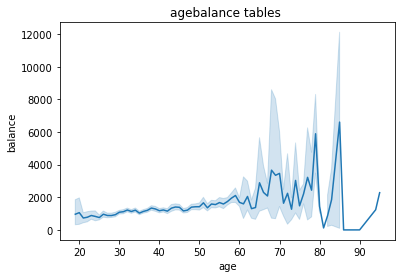

In [89]:
lingraph(df, "age", "balance")



- As the age of an idividual goes up, it shows that the balance of that person goes up incrementally. 
- the most change for the people tend to happen between 80 - 90 years old in which it gies from ~200 to about ~6100. 

<AxesSubplot:xlabel='marital', ylabel='age'>

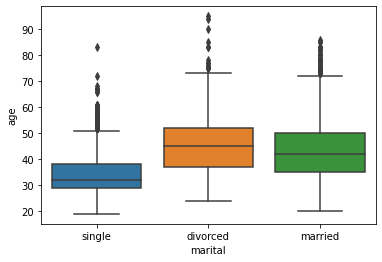

In [90]:
sns.boxplot(x='marital', y='age', data=df, order=['single','divorced','married'])


- Appears to be some outliers for Age and marital status 
- most people divorce and re marry around the same ages

# Steps 
- Deal with Outliers
- Impute missing Values
- Label Encode/One Hot encode categorical values
- Apply Dimensionality Reduction
- Apply Feature Selection

In [91]:
df_clean = LabelEncoding(df_clean, [ "y", "default", "housing", "loan" ] )

In [92]:
df_clean

age           job   marital  education  default  balance  housing  \
0       58    management   married   tertiary        0     2143        1   
1       44    technician    single  secondary        0       29        1   
2       33  entrepreneur   married  secondary        0        2        1   
3       47   blue-collar   married    unknown        0     1506        1   
4       33       unknown    single    unknown        0        1        0   
...    ...           ...       ...        ...      ...      ...      ...   
39995   53    technician   married   tertiary        0      395        0   
39996   30    management    single   tertiary        0     3340        0   
39997   54         admin  divorced  secondary        0      200        0   
39998   34    management   married   tertiary        0     1047        0   
39999   38    technician   married  secondary        0     1442        1   

       loan   contact  day month  duration  campaign  y  
0         0   unknown    5   may       261         1  0  
1         0   unknown    5   may       151         1  0  
2         1   unknown    5   may        76         1  0  
3         0   unknown    5   may        92         1  0  
4         0   unknown    5   may       198         1  0  
...     ...       ...  ...   ...       ...       ... ..  
39995     0  cellular    3   jun       107         1  0  
39996     0  cellular    3   jun       238         3  1  
39997     0  cellular    3   jun       170         1  1  
39998     0  cellular    3   jun       342         1  0  
39999     0  cellular    3   jun       113         1  0  

[40000 rows x 14 columns]

In [93]:
dummies = pd.get_dummies(df_clean[["job","marital", "education", "contact", "month"]], drop_first= True)
dummies

job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                    0                 0              0               1   
1                    0                 0              0               0   
2                    0                 1              0               0   
3                    1                 0              0               0   
4                    0                 0              0               0   
...                ...               ...            ...             ...   
39995                0                 0              0               0   
39996                0                 0              0               1   
39997                0                 0              0               0   
39998                0                 0              0               1   
39999                0                 0              0               0   

       job_retired  job_self-employed  job_services  job_student  \
0                0                  0             0            0   
1                0                  0             0            0   
2                0                  0             0            0   
3                0                  0             0            0   
4                0                  0             0            0   
...            ...                ...           ...          ...   
39995            0                  0             0            0   
39996            0                  0             0            0   
39997            0                  0             0            0   
39998            0                  0             0            0   
39999            0                  0             0            0   

       job_technician  job_unemployed  ...  month_aug  month_dec  month_feb  \
0                   0               0  ...          0          0          0   
1                   1               0  ...          0          0          0   
2                   0               0  ...          0          0          0   
3                   0               0  ...          0          0          0   
4                   0               0  ...          0          0          0   
...               ...             ...  ...        ...        ...        ...   
39995               1               0  ...          0          0          0   
39996               0               0  ...          0          0          0   
39997               0               0  ...          0          0          0   
39998               0               0  ...          0          0          0   
39999               1               0  ...          0          0          0   

       month_jan  month_jul  month_jun  month_mar  month_may  month_nov  \
0              0          0          0          0          1          0   
1              0          0          0          0          1          0   
2              0          0          0          0          1          0   
3              0          0          0          0          1          0   
4              0          0          0          0          1          0   
...          ...        ...        ...        ...        ...        ...   
39995          0          0          1          0          0          0   
39996          0          0          1          0          0          0   
39997          0          0          1          0          0          0   
39998          0          0          1          0          0          0   
39999          0          0          1          0          0          0   

       month_oct  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
39995          0  
39996          0  
39997          0  
39998          0  
39999          0  

[40000 rows x 28 columns]

In [94]:
df_clean = pd.concat([df_clean,dummies],axis='columns')

In [95]:
df_clean.drop("job", axis = 1, inplace= True)

In [96]:
df_clean.drop(df_clean[["marital", "education", "contact", "month"]], axis= 1, inplace= True)

In [97]:
X = df_clean.drop("y", axis= 1)
y = df_clean["y"]



In [98]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [99]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [100]:
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 32000, Test set:8000
Fold:2, Train set: 32000, Test set:8000
Fold:3, Train set: 32000, Test set:8000
Fold:4, Train set: 32000, Test set:8000
Fold:5, Train set: 32000, Test set:8000


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [102]:
score = cross_val_score(LogisticRegression(random_state= 42, max_iter= 1000), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

/Users/jaredpeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/jaredpeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Scores for each fold are: [0.93425  0.932875 0.935    0.933    0.93425 ]
Average score: 0.93


In [103]:
score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.9115   0.91675  0.914625 0.91025  0.920875]
Average score: 0.91


In [104]:


score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.937625 0.9375   0.937    0.93475  0.93725 ]
Average score: 0.94


In [105]:
# different tuning parameters for Logistic Regression

In [106]:

algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for algo in algorithms:
    score = cross_val_score(LogisticRegression(max_iter= 4000, solver= algo, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({algo}): {"{:.3f}".format(score.mean())}')
    

Average score(newton-cg): 0.935
Average score(lbfgs): 0.934
Average score(liblinear): 0.935
Average score(sag): 0.931
Average score(saga): 0.931


In [107]:
max_depth = [1,2,3,4,5,6,7,8,9,10, 11, 12]

for val in max_depth:
    score = cross_val_score(DecisionTreeClassifier(max_depth= val, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 0.928
Average score(2): 0.933
Average score(3): 0.933
Average score(4): 0.934
Average score(5): 0.934
Average score(6): 0.934
Average score(7): 0.935
Average score(8): 0.934
Average score(9): 0.934
Average score(10): 0.933
Average score(11): 0.932
Average score(12): 0.930


In [108]:
 n_estimators = [50, 100, 150, 200, 250, 300, 350]

for val in n_estimators:
    score = cross_val_score(ensemble.RandomForestClassifier(n_estimators= val, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(50): 0.936
Average score(100): 0.937
Average score(150): 0.936
Average score(200): 0.936
Average score(250): 0.937
Average score(300): 0.937
Average score(350): 0.937


<AxesSubplot:>

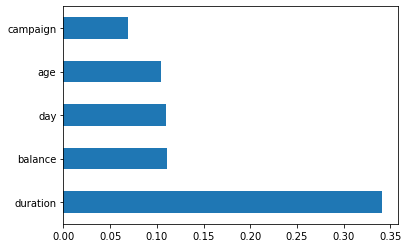

In [109]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier().fit(X, y)
feature_importance_series = pd.Series(model.feature_importances_, index = X.columns)
feature_importance_series.nlargest(5).plot(kind = "barh")

 # conclusions
 -  best features - duration balance, day, age, day, campaign
 - Random Forrest Classification 94%
 - Logistic Classifcation 93 %
 - 